In [24]:

######## Library loading ##########
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import datetime

# EDA

* Sales Trend

In [20]:
df_month = pd.read_csv("month_sales.csv", index_col=0)

In [21]:
df_month.head()

,year,month,total_customer,total_sales
0,2013,7,26105,8.581949e+06
1,2012,4,259632,1.035124e+08
2,2012,7,271484,1.083508e+08
3,2012,3,255178,1.008984e+08
4,2012,12,297856,1.085580e+08


In [38]:
df_month["month2"] = pd.to_datetime(df_month["year"].astype(str) + "-" + df_month["month"].astype(str) + "-01")

In [39]:
plot_df = df_month.iloc[:,2:].groupby("month2").sum(); 

In [40]:
plot_df

,total_customer,total_sales
month2,,
2012-03-01,255178,1.008984e+08
2012-04-01,259632,1.035124e+08
2012-05-01,264064,1.062353e+08
2012-06-01,267819,1.049743e+08
2012-07-01,271484,1.083508e+08
2012-08-01,275436,1.094382e+08
2012-09-01,278965,1.089372e+08
2012-10-01,283033,1.108728e+08
2012-11-01,293654,1.108472e+08


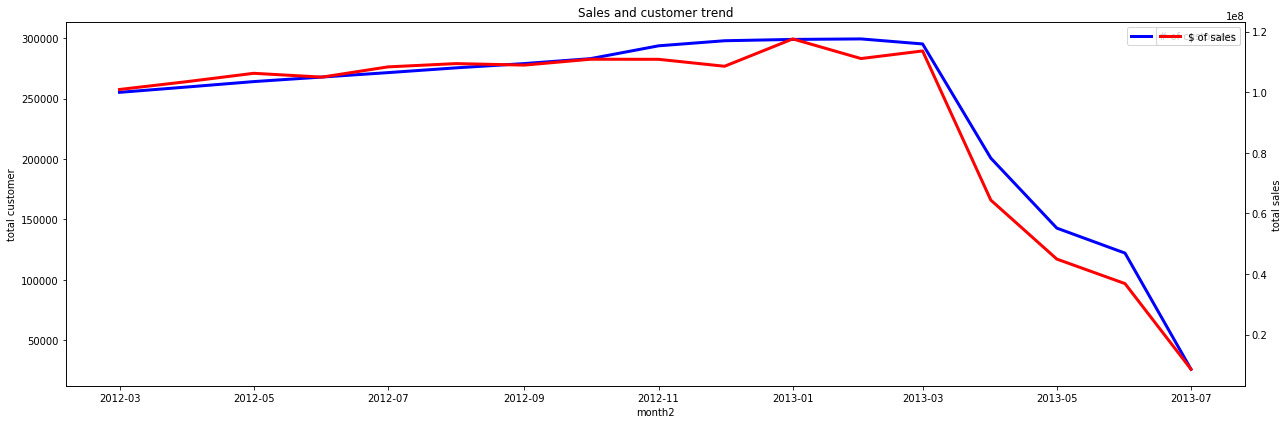

In [45]:
### Trend plot

fig, ax1 = plt.subplots(figsize = (18,6))

ax1.plot(plot_df["total_customer"],c="b", linewidth=3, label='# of customers')

ax1.set_xlabel('month2')
ax1.set_ylabel('total customer')
ax1.tick_params(axis='y')
ax1.set_title("Sales and customer trend")
ax1.legend()


ax2 = ax1.twinx()
ax2.plot(plot_df["total_sales"],c="r", linewidth=3, label='$ of sales')
ax2.set_ylabel('total sales')
ax2.tick_params(axis='y')

ax2.legend()

fig.tight_layout() 

In [3]:
df_brand = pd.read_csv("brand_sales.csv", index_col=0)

In [4]:
ts = df_brand.iloc[:,2:].sum()
total = np.array([311541, ts])

In [5]:
df_brand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35689 entries, 0 to 35688
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           35689 non-null  int64  
 1   total_customer  35689 non-null  int64  
 2   total_sales     35689 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [6]:
g = df_brand.groupby("brand")
df2 = g.sum();df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35689 entries, 0 to 108689
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_customer  35689 non-null  int64  
 1   total_sales     35689 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 836.5 KB


In [12]:
df2 = df2.sort_values("total_customer").tail(20)

In [13]:
df2

,total_customer,total_sales
brand,,
20230,181798,6.272315e+06
18584,181868,5.102097e+06
1393,184675,2.798895e+06
13967,189522,3.285463e+06
8164,193229,2.508712e+06
4704,195011,3.986463e+06
8247,199329,3.636390e+06
1756,201684,3.868342e+06
10241,205704,6.891436e+06


In [23]:
df3 = df2 / total

In [27]:
# top 20 brand
list(df3.index)

[20230,
 18584,
 1393,
 13967,
 8164,
 4704,
 8247,
 1756,
 10241,
 13791,
 14760,
 13310,
 11382,
 14029,
 5072,
 88199,
 2820,
 9886,
 33170,
 0]

In [29]:
df_cust = pd.read_csv("ndb.csv", index_col=0)

In [30]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311541 entries, 0 to 311540
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       311541 non-null  int64  
 1   first_purchase_date      311541 non-null  object 
 2   last_purchase_date       311541 non-null  object 
 3   total_purchases          311541 non-null  int64  
 4   total_purchase_quantity  311541 non-null  int64  
 5   total_purchase_amount    311541 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 26.6+ MB


In [ ]:
df_cust["id_g"] = 